# loading packages 

In [2]:
#!pip install evaluate
#!pip install tensorflow
#!pip install tf_keras

In [3]:


import pandas as pd
import nltk
import matplotlib 
from transformers import DistilBertForSequenceClassification, TrainingArguments, Trainer
import evaluate
import numpy as np
import torch.nn as nn
import tensorflow as tf
import tf_keras as keras
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from datasets import Dataset, Features, Value, ClassLabel, Sequence
from transformers import AutoTokenizer, DataCollatorWithPadding, AutoConfig



# Data Processing

## Berkeley Data Loading & Preprocessing

In [4]:



berkeley = pd.read_parquet("hf://datasets/ucberkeley-dlab/measuring-hate-speech/measuring-hate-speech.parquet")

columns_relevant =  ['hatespeech', 'text', 'target_race_asian', 'target_race_black', 'target_race_latinx', 'target_race_middle_eastern',
'target_race_native_american', 'target_race_pacific_islander', 'target_race_white', 'target_religion_atheist', 'target_religion_buddhist',
'target_religion_christian', 'target_religion_hindu', 'target_religion_jewish', 'target_religion_mormon', 'target_religion_muslim', 
'target_religion_other', 'target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_undocumented', 
'target_gender_men', 'target_gender_non_binary', 'target_gender_transgender_men', 'target_gender_transgender_unspecified',
'target_gender_transgender_women', 'target_gender_women', 'target_sexuality_bisexual', 'target_sexuality_gay', 'target_sexuality_lesbian',
'target_sexuality_straight', 'target_sexuality_other', 'target_disability_physical', 'target_disability_cognitive',
'target_disability_neurological', 'target_disability_visually_impaired', 'target_disability_hearing_impaired', 'target_disability_unspecific',
'target_disability_other']

berkeley_columns_relevant = berkeley[columns_relevant]
berkeley_columns_relevant.head()

hatespeech                                               text  \
0         0.0  Yes indeed. She sort of reminds me of the elde...   
1         0.0  The trans women reading this tweet right now i...   
2         2.0  Question: These 4 broads who criticize America...   
3         0.0  It is about time for all illegals to go back t...   
4         2.0  For starters bend over the one in pink and kic...   

   target_race_asian  target_race_black  target_race_latinx  \
0               True               True                True   
1              False              False               False   
2              False              False               False   
3              False              False               False   
4              False              False               False   

   target_race_middle_eastern  target_race_native_american  \
0                        True                         True   
1                       False                        False   
2                       False                        False   
3                       False                        False   
4                       False                        False   

   target_race_pacific_islander  target_race_white  target_religion_atheist  \
0                          True               True                    False   
1                         False              False                    False   
2                         False              False                    False   
3                         False              False                    False   
4                         False              False                    False   

   ...  target_sexuality_lesbian  target_sexuality_straight  \
0  ...                     False                      False   
1  ...                     False                      False   
2  ...                     False                      False   
3  ...                     False                      False   
4  ...                     False                      False   

   target_sexuality_other  target_disability_physical  \
0                   False                       False   
1                   False                       False   
2                   False                       False   
3                   False                       False   
4                   False                       False   

   target_disability_cognitive  target_disability_neurological  \
0                        False                           False   
1                        False                           False   
2                        False                           False   
3                        False                           False   
4                        False                           False   

   target_disability_visually_impaired  target_disability_hearing_impaired  \
0                                False                               False   
1                                False                               False   
2                                False                               False   
3                                False                               False   
4                                False                               False   

   target_disability_unspecific  target_disability_other  
0                         False                    False  
1                         False                    False  
2                         False                    False  
3                         False                    False  
4                         False                    False  

[5 rows x 38 columns]

### Non-Hate Text Removal

In [5]:
berkely_hate = berkeley_columns_relevant[berkeley_columns_relevant['hatespeech'] > 0]
berkely_hate



hatespeech                                               text  \
2              2.0  Question: These 4 broads who criticize America...   
4              2.0  For starters bend over the one in pink and kic...   
6              2.0  Who the fuck is this insignificant simple mind...   
7              2.0         Fuck off you insufferable retarded faggot.   
9              2.0  Worthless whore, these tits with look nice wit...   
...            ...                                                ...   
135523         1.0  Lady in the back Blinks when "her" camera red ...   
135546         1.0  üî•PUBG JAPAN SERIES üî•Grade2 Day2 6/7 <Round8> 1...   
135547         1.0  ŸÑÿß ÿ™ÿ™ÿ¥ŸÖÿ™ ÿßŸÑÿ±ÿ¨ÿßŸÑ ŸÖÿ≥ŸÉŸäŸÜ ŸäÿπÿßŸÜŸä ŸÉÿ≥ ÿßŸÖŸá üòÇ. ŸäŸÇŸàŸÑ ŸäÿßŸÑ...   
135548         1.0  #DSSUpliftsTheThirdGender #EmancipationOfEunuc...   
135555         2.0  ŸÑÿß ÿ™ÿ™ÿ¥ŸÖÿ™ ÿßŸÑÿ±ÿ¨ÿßŸÑ ŸÖÿ≥ŸÉŸäŸÜ ŸäÿπÿßŸÜŸä ŸÉÿ≥ ÿßŸÖŸá üòÇ. ŸäŸÇŸàŸÑ ŸäÿßŸÑ...   

        target_race_asian  target_race_black  target_race_latinx  \
2                   False              False               False   
4                   False              False               False   
6                   False              False               False   
7                   False              False               False   
9                   False              False               False   
...                   ...                ...                 ...   
135523              False              False               False   
135546              False              False               False   
135547              False              False               False   
135548              False              False               False   
135555              False              False               False   

        target_race_middle_eastern  target_race_native_american  \
2                            False                        False   
4                            False                        False   
6                            False                        False   
7                            False                        False   
9                            False                        False   
...                            ...                          ...   
135523                       False                        False   
135546                       False                        False   
135547                       False                        False   
135548                        True                        False   
135555                       False                        False   

        target_race_pacific_islander  target_race_white  \
2                              False              False   
4                              False              False   
6                              False               True   
7                              False              False   
9                              False              False   
...                              ...                ...   
135523                         False              False   
135546                         False              False   
135547                         False              False   
135548                         False              False   
135555                         False              False   

        target_religion_atheist  ...  target_sexuality_lesbian  \
2                         False  ...                     False   
4                         False  ...                     False   
6                         False  ...                     False   
7                         False  ...                     False   
9                         False  ...                     False   
...                         ...  ...                       ...   
135523                    False  ...                     False   
135546                    False  ...                     False   
135547                    False  ...                     False   
135548                    False  ...                     F

### Demographic Column Condensing

In [6]:
lgb_cols = [ 'target_sexuality_bisexual', 'target_sexuality_gay', 'target_sexuality_lesbian', 'target_sexuality_other']

t_cols = ['target_gender_transgender_men', 'target_gender_transgender_unspecified','target_gender_transgender_women']

disability_cols = ['target_disability_physical', 'target_disability_cognitive', 'target_disability_neurological',
'target_disability_visually_impaired', 'target_disability_hearing_impaired', 'target_disability_unspecific', 'target_disability_other']

immigrant_cols = ['target_origin_immigrant', 'target_origin_migrant_worker', 'target_origin_undocumented']


berkely_hate.loc[:, 'Transgender'] = berkely_hate[t_cols].any(axis=1)
berkely_hate.loc[:, 'LGB+'] = berkely_hate[lgb_cols].any(axis=1)
berkely_hate.loc[:, 'Disabled'] = berkely_hate[disability_cols].any(axis=1)
berkely_hate.loc[:, 'Immigrant'] = berkely_hate[immigrant_cols].any(axis=1)


berkely_hate = berkely_hate.copy()
berkely_hate.rename(columns={'target_race_asian': 'Asian', 'target_race_black': 'Black', 'target_race_latinx': 'Latinx', 
'target_race_middle_eastern': 'Middle Eastern', 'target_race_pacific_islander': 'Pacific Islander', 'target_race_white': 'White', 
'target_religion_atheist': 'Atheist', 'target_religion_buddhist': 'Buddhist', 'target_religion_christian':'Christian','target_religion_hindu': 'Hindu', 
'target_religion_jewish': 'Jewish','target_religion_mormon': 'Mormon',
'target_religion_muslim': 'Muslim', 'target_religion_other': 'Other Religion', 'target_gender_men': 'Men', 
'target_gender_non_binary': 'Non-Binary', 'target_gender_women': 'Women', 'target_sexuality_straight': 'Straight', 'target_race_native_american': 'Native American',
}, inplace=True)

berkeley_compressed = berkely_hate.drop(lgb_cols + t_cols + disability_cols + immigrant_cols, axis=1)

berkeley_compressed['hatespeech'] = berkeley_compressed['hatespeech'].apply(lambda x: 1 if x > 0 else 0)
berkeley_compressed

/var/folders/cs/44q29fgn0fl61146hvy__h8h0000gn/T/ipykernel_56504/2584169070.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berkely_hate.loc[:, 'Transgender'] = berkely_hate[t_cols].any(axis=1)
/var/folders/cs/44q29fgn0fl61146hvy__h8h0000gn/T/ipykernel_56504/2584169070.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berkely_hate.loc[:, 'LGB+'] = berkely_hate[lgb_cols].any(axis=1)
/var/folders/cs/44q29fgn0fl61146hvy__h8h0000gn/T/ipykernel_56504/2584169070.py:13: SettingWithCopyWarning: 
A value is 

hatespeech                                               text  Asian  \
2                1  Question: These 4 broads who criticize America...  False   
4                1  For starters bend over the one in pink and kic...  False   
6                1  Who the fuck is this insignificant simple mind...  False   
7                1         Fuck off you insufferable retarded faggot.  False   
9                1  Worthless whore, these tits with look nice wit...  False   
...            ...                                                ...    ...   
135523           1  Lady in the back Blinks when "her" camera red ...  False   
135546           1  üî•PUBG JAPAN SERIES üî•Grade2 Day2 6/7 <Round8> 1...  False   
135547           1  ŸÑÿß ÿ™ÿ™ÿ¥ŸÖÿ™ ÿßŸÑÿ±ÿ¨ÿßŸÑ ŸÖÿ≥ŸÉŸäŸÜ ŸäÿπÿßŸÜŸä ŸÉÿ≥ ÿßŸÖŸá üòÇ. ŸäŸÇŸàŸÑ ŸäÿßŸÑ...  False   
135548           1  #DSSUpliftsTheThirdGender #EmancipationOfEunuc...  False   
135555           1  ŸÑÿß ÿ™ÿ™ÿ¥ŸÖÿ™ ÿßŸÑÿ±ÿ¨ÿßŸÑ ŸÖÿ≥ŸÉŸäŸÜ ŸäÿπÿßŸÜŸä ŸÉÿ≥ ÿßŸÖŸá üòÇ. ŸäŸÇŸàŸÑ ŸäÿßŸÑ...  False   

        Black  Latinx  Middle Eastern  Native American  Pacific Islander  \
2       False   False           False            False             False   
4       False   False           False            False             False   
6       False   False           False            False             False   
7       False   False           False            False             False   
9       False   False           False            False             False   
...       ...     ...             ...              ...               ...   
135523  False   False           False            False             False   
135546  False   False           False            False             False   
135547  False   False           False            False             False   
135548  False   False            True            False             False   
135555  False   False           False            False             False   

        White  Atheist  ...  Muslim  Other Religion    Men  Non-Binary  Women  \
2       False    False  ...   False           False  False       False  False   
4       False    False  ...   False           False  False       False   True   
6        True    False  ...   False           False  False       False  False   
7       False    False  ...   False           False  False       False  False   
9       False    False  ...   False           False  False       False   True   
...       ...      ...  ...     ...             ...    ...         ...    ...   
135523  False    False  ...   False           False  False       False  False   
135546  False    False  ...   False           False  False       False  False   
135547  False    False  ...   False           False  False       False  False   
135548  False    False  ...   False           False  False       False  False   
135555  False    False  ...   False           False  False       False  False   

        Straight  Transgender   LGB+  Disabled  Immigrant  
2          False        False  False     False       True  
4          False        False  False     False      False  
6          False        False  False     False      False  
7          False        False   True     False      False  
9          False        False  False     False      False  
...          ...          ...    ...       ...        ...  
135523     False        False   True     False      False  
135546     False        False  False     False      False  
135547     False        False  False     False      False  
135548     False        False  False     False      False  
135555     False        False  False     False      False  

[54932 rows x 25 columns]

### Demographic Distribution Visualization

Asian  Black  Latinx  Middle Eastern  Native American  \
Demographic   3651  13699    4370            4464              679   

             Pacific Islander  White  Atheist  Buddhist  Christian  ...  \
Demographic               696   3692      254       202       1173  ...   

             Mormon  Other Religion   Men  Non-Binary  Women  Straight  LGB+  \
Demographic     237             599  3038         484  10693      1484  7804   

             Transgender  Disabled  Immigrant  
Demographic         1497      2365       5586  

[1 rows x 23 columns]

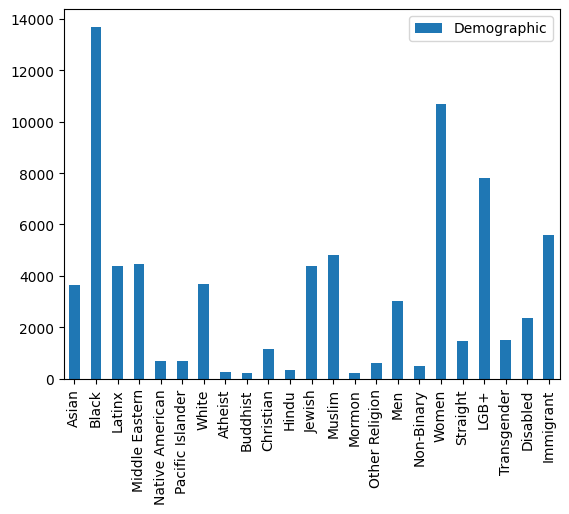

In [7]:
columns_to_sum = ['Asian', 'Black', 'Latinx', 'Middle Eastern', 'Native American', 'Pacific Islander', 'White', 'Atheist', 'Buddhist', 'Christian','Hindu', 'Jewish', 'Muslim', 'Mormon', 'Other Religion', 'Men', 'Non-Binary', 'Women', 'Straight', 'LGB+','Transgender', 'Disabled', 'Immigrant']






hate_counts = berkeley_compressed[columns_to_sum].where(berkeley_compressed['hatespeech'] == 1).sum().to_frame().T


hate_counts.index = ['Demographic']


hate_counts.T.plot.bar(stacked=True)
hate_counts.head()


### Multi-Label to Multi-Class

### Removing Low-Frequency Demographics

In [8]:
#removing native american, pacific islander, athiest, buddhist,  hindu, mormon, other religions, non-binary
high_frequency_targets = berkeley_compressed.drop(['Native American', 'Pacific Islander', 'Atheist', 'Buddhist', 
                                                     'Hindu', 'Mormon', 'Other Religion', 'Non-Binary', 'Straight'], axis = 1)
high_frequency_targets

hatespeech                                               text  Asian  \
2                1  Question: These 4 broads who criticize America...  False   
4                1  For starters bend over the one in pink and kic...  False   
6                1  Who the fuck is this insignificant simple mind...  False   
7                1         Fuck off you insufferable retarded faggot.  False   
9                1  Worthless whore, these tits with look nice wit...  False   
...            ...                                                ...    ...   
135523           1  Lady in the back Blinks when "her" camera red ...  False   
135546           1  üî•PUBG JAPAN SERIES üî•Grade2 Day2 6/7 <Round8> 1...  False   
135547           1  ŸÑÿß ÿ™ÿ™ÿ¥ŸÖÿ™ ÿßŸÑÿ±ÿ¨ÿßŸÑ ŸÖÿ≥ŸÉŸäŸÜ ŸäÿπÿßŸÜŸä ŸÉÿ≥ ÿßŸÖŸá üòÇ. ŸäŸÇŸàŸÑ ŸäÿßŸÑ...  False   
135548           1  #DSSUpliftsTheThirdGender #EmancipationOfEunuc...  False   
135555           1  ŸÑÿß ÿ™ÿ™ÿ¥ŸÖÿ™ ÿßŸÑÿ±ÿ¨ÿßŸÑ ŸÖÿ≥ŸÉŸäŸÜ ŸäÿπÿßŸÜŸä ŸÉÿ≥ ÿßŸÖŸá üòÇ. ŸäŸÇŸàŸÑ ŸäÿßŸÑ...  False   

        Black  Latinx  Middle Eastern  White  Christian  Jewish  Muslim  \
2       False   False           False  False      False   False   False   
4       False   False           False  False      False   False   False   
6       False   False           False   True      False   False   False   
7       False   False           False  False      False   False   False   
9       False   False           False  False      False   False   False   
...       ...     ...             ...    ...        ...     ...     ...   
135523  False   False           False  False      False   False   False   
135546  False   False           False  False      False   False   False   
135547  False   False           False  False      False   False   False   
135548  False   False            True  False      False   False   False   
135555  False   False           False  False      False   False   False   

          Men  Women  Transgender   LGB+  Disabled  Immigrant  
2       False  False        False  False     False       True  
4       False   True        False  False     False      False  
6       False  False        False  False     False      False  
7       False  False        False   True     False      False  
9       False   True        False  False     False      False  
...       ...    ...          ...    ...       ...        ...  
135523  False  False        False   True     False      False  
135546  False  False        False  False     False      False  
135547  False  False        False  False     False      False  
135548  False  False        False  False     False      False  
135555  False  False        False  False     False      False  

[54932 rows x 16 columns]

### Multi-Labeled Demographic Removal

In [9]:
num_identities = high_frequency_targets.loc[:,"Asian":"Immigrant"].sum(axis = 1)


multi_identities = num_identities > 1
no_identities = num_identities == 0

berkely_dropped_none = high_frequency_targets[~no_identities]
berkely_dropped_multi = berkely_dropped_none[~multi_identities]

berkely_dropped_multi

/var/folders/cs/44q29fgn0fl61146hvy__h8h0000gn/T/ipykernel_56504/4207164671.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  berkely_dropped_multi = berkely_dropped_none[~multi_identities]


hatespeech                                               text  Asian  \
2                1  Question: These 4 broads who criticize America...  False   
4                1  For starters bend over the one in pink and kic...  False   
6                1  Who the fuck is this insignificant simple mind...  False   
7                1         Fuck off you insufferable retarded faggot.  False   
9                1  Worthless whore, these tits with look nice wit...  False   
...            ...                                                ...    ...   
135406           1  Lady in the back Blinks when "her" camera red ...  False   
135435           1  Lady in the back Blinks when "her" camera red ...  False   
135515           1  Lady in the back Blinks when "her" camera red ...  False   
135523           1  Lady in the back Blinks when "her" camera red ...  False   
135548           1  #DSSUpliftsTheThirdGender #EmancipationOfEunuc...  False   

        Black  Latinx  Middle Eastern  White  Christian  Jewish  Muslim  \
2       False   False           False  False      False   False   False   
4       False   False           False  False      False   False   False   
6       False   False           False   True      False   False   False   
7       False   False           False  False      False   False   False   
9       False   False           False  False      False   False   False   
...       ...     ...             ...    ...        ...     ...     ...   
135406  False   False           False  False      False   False   False   
135435  False   False           False  False      False   False   False   
135515  False   False           False  False      False   False   False   
135523  False   False           False  False      False   False   False   
135548  False   False            True  False      False   False   False   

          Men  Women  Transgender   LGB+  Disabled  Immigrant  
2       False  False        False  False     False       True  
4       False   True        False  False     False      False  
6       False  False        False  False     False      False  
7       False  False        False   True     False      False  
9       False   True        False  False     False      False  
...       ...    ...          ...    ...       ...        ...  
135406  False  False        False   True     False      False  
135435  False  False         True  False     False      False  
135515  False  False         True  False     False      False  
135523  False  False        False   True     False      False  
135548  False  False        False  False     False      False  

[38605 rows x 16 columns]

### Multi-Class Training Dataset Transformation

In [10]:

multi_class_column = pd.from_dummies(berkely_dropped_multi.loc[:,'Asian':'Immigrant'])
multi_class_column

2            Immigrant
4                Women
6                White
7                 LGB+
9                Women
...                ...
135406            LGB+
135435     Transgender
135515     Transgender
135523            LGB+
135548  Middle Eastern

[38605 rows x 1 columns]

In [11]:
multi_class = pd.concat([berkely_dropped_multi,multi_class_column], axis = 1)
multi_class

hatespeech                                               text  Asian  \
2                1  Question: These 4 broads who criticize America...  False   
4                1  For starters bend over the one in pink and kic...  False   
6                1  Who the fuck is this insignificant simple mind...  False   
7                1         Fuck off you insufferable retarded faggot.  False   
9                1  Worthless whore, these tits with look nice wit...  False   
...            ...                                                ...    ...   
135406           1  Lady in the back Blinks when "her" camera red ...  False   
135435           1  Lady in the back Blinks when "her" camera red ...  False   
135515           1  Lady in the back Blinks when "her" camera red ...  False   
135523           1  Lady in the back Blinks when "her" camera red ...  False   
135548           1  #DSSUpliftsTheThirdGender #EmancipationOfEunuc...  False   

        Black  Latinx  Middle Eastern  White  Christian  Jewish  Muslim  \
2       False   False           False  False      False   False   False   
4       False   False           False  False      False   False   False   
6       False   False           False   True      False   False   False   
7       False   False           False  False      False   False   False   
9       False   False           False  False      False   False   False   
...       ...     ...             ...    ...        ...     ...     ...   
135406  False   False           False  False      False   False   False   
135435  False   False           False  False      False   False   False   
135515  False   False           False  False      False   False   False   
135523  False   False           False  False      False   False   False   
135548  False   False            True  False      False   False   False   

          Men  Women  Transgender   LGB+  Disabled  Immigrant                  
2       False  False        False  False     False       True       Immigrant  
4       False   True        False  False     False      False           Women  
6       False  False        False  False     False      False           White  
7       False  False        False   True     False      False            LGB+  
9       False   True        False  False     False      False           Women  
...       ...    ...          ...    ...       ...        ...             ...  
135406  False  False        False   True     False      False            LGB+  
135435  False  False         True  False     False      False     Transgender  
135515  False  False         True  False     False      False     Transgender  
135523  False  False        False   True     False      False            LGB+  
135548  False  False        False  False     False      False  Middle Eastern  

[38605 rows x 17 columns]

In [12]:
multi_class.columns.values[16] = "label"

multi_class

hatespeech                                               text  Asian  \
2                1  Question: These 4 broads who criticize America...  False   
4                1  For starters bend over the one in pink and kic...  False   
6                1  Who the fuck is this insignificant simple mind...  False   
7                1         Fuck off you insufferable retarded faggot.  False   
9                1  Worthless whore, these tits with look nice wit...  False   
...            ...                                                ...    ...   
135406           1  Lady in the back Blinks when "her" camera red ...  False   
135435           1  Lady in the back Blinks when "her" camera red ...  False   
135515           1  Lady in the back Blinks when "her" camera red ...  False   
135523           1  Lady in the back Blinks when "her" camera red ...  False   
135548           1  #DSSUpliftsTheThirdGender #EmancipationOfEunuc...  False   

        Black  Latinx  Middle Eastern  White  Christian  Jewish  Muslim  \
2       False   False           False  False      False   False   False   
4       False   False           False  False      False   False   False   
6       False   False           False   True      False   False   False   
7       False   False           False  False      False   False   False   
9       False   False           False  False      False   False   False   
...       ...     ...             ...    ...        ...     ...     ...   
135406  False   False           False  False      False   False   False   
135435  False   False           False  False      False   False   False   
135515  False   False           False  False      False   False   False   
135523  False   False           False  False      False   False   False   
135548  False   False            True  False      False   False   False   

          Men  Women  Transgender   LGB+  Disabled  Immigrant           label  
2       False  False        False  False     False       True       Immigrant  
4       False   True        False  False     False      False           Women  
6       False  False        False  False     False      False           White  
7       False  False        False   True     False      False            LGB+  
9       False   True        False  False     False      False           Women  
...       ...    ...          ...    ...       ...        ...             ...  
135406  False  False        False   True     False      False            LGB+  
135435  False  False         True  False     False      False     Transgender  
135515  False  False         True  False     False      False     Transgender  
135523  False  False        False   True     False      False            LGB+  
135548  False  False        False  False     False      False  Middle Eastern  

[38605 rows x 17 columns]

In [13]:
berkely_dropped_multi.iloc[7]

hatespeech                                                        1
text              Dwight Howard is a undercover Faggot, this guy...
Asian                                                         False
Black                                                         False
Latinx                                                        False
Middle Eastern                                                False
White                                                         False
Christian                                                     False
Jewish                                                        False
Muslim                                                        False
Men                                                           False
Women                                                         False
Transgender                                                   False
LGB+                                                           True
Disabled                                        

## Arabic Data Reading

In [14]:
arabic_data = pd.read_csv('levantine_arabic.csv',sep = ",")
arabic_data = arabic_data[arabic_data['Class'] == "hate"]
arabic_data

Tweet Class  \
6     ŸÖÿß ÿ≥ŸÖÿπŸÜÿß ÿ¨ÿπÿßÿ±ŸÉŸÖ ŸÖÿ®ÿßÿ±ÿ≠ ÿπŸÑŸâ ÿßŸÑŸÇÿµŸÅ ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä ŸäŸÑŸä...  hate   
12    Ÿäÿß ÿπŸäÿ®Ÿà ÿπŸÑŸäŸÉŸä Ÿäÿß ÿ•Ÿäÿ±ÿßŸÜ ÿπŸÖ ÿ™ÿ≠ŸàŸä ÿ•ÿ±Ÿáÿßÿ®ŸäŸäŸÜ ÿ™ÿπŸÑŸÖŸä ...  hate   
60    ŸÑÿß ŸÉŸÑ ÿßŸÑÿ´Ÿàÿßÿßÿ± ŸÉŸÑÿßÿ® ŸÖÿ™ŸÑ ÿßŸÑŸÜÿ∏ÿßŸÖ ŸáŸäŸÉ ÿ¨ŸÖŸÑÿ© ÿ≥ŸáŸÑ ŸÇŸàŸÑ...  hate   
68    ÿ£ÿ∞ÿß ÿ¨ÿ®ÿ±ÿßŸÜ ÿ®ÿßÿ≥ŸäŸÑ ŸäŸÇŸàÿØŸÉŸÖ ŸàÿßŸÑÿ¨ÿßŸáŸÑ ÿ¥ŸäÿÆ ÿßŸÑÿ¨ÿßŸáŸÑŸäÿ© Ÿäÿµ...  hate   
103                    ŸÅŸáŸÖÿ™Ÿàÿß Ÿäÿß ÿ≠ŸÇŸàÿØŸäŸÜ Ÿäÿß ÿ¨ŸÖÿßÿπÿ© ÿßŸÑÿ≠ÿ±ŸÉÿ©  hate   
...                                                 ...   ...   
5758  ÿ¨ÿ®ÿ±ÿßŸÜ ÿ®ÿßÿ≥ŸäŸÑ ÿπÿßÿ± ÿπŸÑŸâ ÿßŸÑÿπÿ±ÿ® ŸÉŸÉŸÑ ŸÖÿßŸáŸà ÿßŸÑÿß ŸÅÿ±ÿÆ ŸÖÿ¨Ÿà...  hate   
5766  ŸÑÿ®ŸÜÿßŸÜ ÿ¥ÿßŸÖÿÆ ÿ®ÿπÿ±Ÿàÿ®ÿ™Ÿà ÿ®ÿ£ÿÆŸàÿßÿ™Ÿà ÿßŸÑÿπÿ±ÿ® ÿ®ÿ≥ ÿßŸÑŸÅÿ±ÿ≥ ŸÖÿß ÿ¨...  hate   
5781  ŸÑÿß ÿ™ŸÜÿ≥Ÿâ ÿßŸÜ Ÿáÿ∞ÿß ÿßŸÑŸàŸáÿßÿ® ÿπŸÜÿµÿ±Ÿä Ÿàÿ≠ÿßŸÇÿØ ŸàÿÆÿßÿØŸÖ ÿ£ŸÖŸäŸÜ ŸÑ...  hate   
5782  ÿ•ÿÆÿ≤ÿßŸÉ ÿßŸÑŸÑŸá ŸÉŸÜÿß ŸÖÿÆÿØŸàÿπŸäŸÜ ŸÅŸäŸÉ ÿßŸà ÿßŸÜŸÉ ÿ£ŸÅÿØÿ∫ ŸÖÿµÿ≠ŸàŸÉ ÿπ...  hate   
5844  ŸÑŸäÿ¥ ÿ™ŸäŸàÿ≥ ÿßŸÑÿ•ŸÖÿßÿ±ÿ™ ŸàÿßŸÑÿ≥ÿπŸàÿØŸäÿ© ŸÖÿπ ÿßŸÑÿ≥Ÿàÿ±ŸäŸäŸÜ ŸàÿßŸÑŸäŸÖŸÜŸä...  hate   

                                                english  
6     We did not hear your screams yesterday regardi...  
12    Shame on you, Iran contains terrorists. Learn ...  
60    No, all revolutionaries are dogs like the regi...  
68    If Gebran Bassil leads you and the ignorant sh...  
103   You understand, you spiteful people, movement ...  
...                                                 ...  
5758  Gebran Bassil is a disgrace to the Arabs as a ...  
5766  Lebanon is proud of its Arabism and its Arab s...  
5781  Do not forget that this Wahhab is racist, hate...  
5782  May God disgrace you, we were deceived about y...  
5844  Why are the goats of the Emirates and Saudi Ar...  

[468 rows x 3 columns]

## German Data Reading

In [53]:
german_data = pd.read_csv('german.csv',sep = ",")
german_data["Sexism Count Crowd"] = german_data["Sexism Count Crowd"].apply(lambda x: 1 if x > 0 else 0)
german_data["Racism Count Crowd"] = german_data["Racism Count Crowd"].apply(lambda x: 1 if x > 0 else 0)

german_data = german_data[(german_data["Sexism Count Crowd"] == 1) | (german_data["Racism Count Crowd"] == 1)]
german_data

84999


id                                               Text  \
7      1911253  Und wieder mal ist die sprechende F√∂hnfrisur F...   
20     1911319  Bundesmutti:  ich weiss nicht was der rest der...   
23     1911333  Menschen in Zwangsma√ünahmen stecken, Willk√ºr u...   
37     1911387  Zu den Banden geh√∂rt aber auch der Staat. Wer ...   
49     1911443  das alles ist wie Selbstbefriedigung...denn sc...   
...        ...                                                ...   
84974  2512315  Eine rassige Frau ist  klasse. Da bin ich scho...   
84986  2516601  W√§hrend unsere St√§dte ungehindert von einem Mi...   
84993  2520917  Zitat  "Er sei zu klein und zu h√§sslich, verdi...   
84994  2522729  Mein Gott!! Was f√ºr ein entsetzliches Gequatsc...   
84998  2522997  Na, dann bin ich ja beruhigt, dass Frl. Julia ...   

                                                 english  Reject Newspaper  \
7      And once again the talking blow-dry hairstyle,...                 0   
20     Mom: I don't know what the rest of the world t...                 0   
23     Putting people in coercive measures, arbitrari...                 0   
37     But the state also belongs to the gangs. Anyon...                 0   
49     all of this is like masturbation... because on...                 1   
...                                                  ...               ...   
84974  A classy woman is great. I'm happy to be a rac...                 1   
84986  While our cities are being plundered unhindere...                 1   
84993  Quote "He is too small and too ugly, doesn't e...                 1   
84994  My God!! What horrible nonsense!!  The lady be...                 1   
84998  Well, then I'm reassured that Miss Julia belie...                 1   

       Reject Crowd  Rejection Count Crowd  Sexism Count Crowd  \
7                 0                      2                   1   
20                0                      1                   1   
23                0                      1                   0   
37                0                      2                   0   
49                1                      4                   1   
...             ...                    ...                 ...   
84974             0                      2                   1   
84986             1                      3                   0   
84993             0                      2                   0   
84994             0                      2                   1   
84998             0                      2                   1   

       Racism Count Crowd  Threat Count Crowd  Insult Count Crowd  \
7                       0                 0.0                 1.0   
20                      0                 0.0                 1.0   
23                      1                 0.0                 0.0   
37                      1                 0.0                 1.0   
49                      0                 0.0                 2.0   
...                   ...                 ...                 ...   
84974                   1                 0.0                 0.0   
84986                   1                 0.0                 2.0   
84993                   1                 0.0                 0.0   
84994                   0                 0.0                 1.0   
84998                   0                 0.0                 0.0   

       Profanity Count Crowd  
7                        0.0  
20                       0.0  
23                       0.0  
37                       0.0  
49                       4.0  
...                      ...  
84974                    0.0  
84986                    0.0  
84993                    1.0  
84994                    0.0  
84998                    0.0  

[7579 rows x 11 columns]

## Korean Data Reading

In [16]:
korean_data = pd.read_csv('korean.csv',sep = ",")
korean_data = korean_data[korean_data['hate'] == "hate"]
korean_data

comments  contain_gender_bias  \
0     (ÌòÑÏû¨ Ìò∏ÌÖîÏ£ºÏù∏ Ïã¨Ï†ï) ÏïÑ18 ÎÇú ÎßàÎ•∏ÌïòÎäòÏóê ÎÇ†Î≤ºÎùΩÎßûÍ≥† Ìò∏ÌÖîÎßùÌïòÍ≤åÏÉùÍ≤ºÎäîÎç∞ ÎàÑÍµ∞ Í≥ÑÏÜç...                False   
2     ...Î™ªÎêú ÎÑòÎì§...ÎÇ®Ïùò Í≥†ÌÜµÏùÑ Ï¶êÍ≤ºÎçò ÎÑòÎì§..Ïù¥Ï†† ÎßàÎïÖÌïú Ï≤òÎ≤åÏùÑ Î∞õÏïÑÏïºÏßÄ..,Í∑∏Îûò...                False   
4     1. ÏÇ¨Îûå ÏñºÍµ¥ ÏÜêÌÜ±ÏúºÎ°ú Í∏ÅÏùÄÍ≤ÉÏùÄ Ïù∏Í≤©ÏÇ¥Ìï¥Ïù¥Í≥†2. ÎèôÏòÅÏÉÅÏù¥ Î™∞Ïπ¥ÎÉê? Î©îÍ±∏Î¶¨ÏïàÎì§ ÏÉùÍ∞Å...                 True   
6     100ÎÖÑÏïàÏóê ÎÇ®ÎÖÄÍ∞Ñ ÏÑ±Ï†ÑÏüÅ ÌïúÎ≤à ÌÅ¨Í≤å ÏπòÎ£¨ ÌõÑ ÏùºÎ∂ÄÎã§Ï≤òÏ†ú, Ïó¨ÏÑ±Ïùò Ï†ïÏπòÏ∞∏Ïó¨ Í∏àÏßÄ, ...                 True   
19    180Ïù¥Ìïò Ìò∏Îπó ÌïúÎÇ®Îì§ÏùÄ Í≤∞Ìòº ÌïòÏßÄÎßàÏÖà „Öã ÎèàÏóÜÏúºÎ©¥ Ïó∞Ïï†ÎèÑ ÌïòÏßÄÎßàÏÖà „Öã ÎãàÎì§ Ìò∏Îπó ...                 True   
...                                                 ...                  ...   
7864                    ÌùëÎ∞úÎØ∏ÎÖÄ???Ïû•ÎÇúÎò•ÎïåÎ¶¨ÎÉê?????ÎßàÎÖÄÎûÄ ÎßêÎèÑ ÏïÑÍπùÎã§!!!                False   
7879       ÌûàÏûå! Í∏∞Ï†ÄÍ∑Ä Ï∞¨ ÎÖÑÎì§Ïù¥ Íµ∞ÎåÄ Íµ∞ÎåÄ Ï£ºÎåïÏù¥ ÌÑ∏Í≥† ÏûêÎπ†Ï°åÎÖ∏„Öã( ¬∞ Õú ñÕ°¬∞)‚ï≠‚à©‚ïÆ                 True   
7880  ÌûàÌä∏Í≥°Ïù¥ ÏóÜÎäîÎç∞ Ï∂îÏñµÌåîÏù¥Í∞ÄÎêòÎäî ÎÜÄÎùºÏö¥ Ï°∞ÏÑ†Ïãù Î∞©ÏÜ°Íµ≠Ïó∞ÏòàÎß§ÎãàÏßï„Öã„Öã Í∏∞ÌöçÏÇ¨ ÏÜåÏÜçÏÇ¨ Í±ç ...                False   
7881  ÌûàÌä∏ÏûëÏù¥ÎûòÎ¥êÏïº ÎØ∏ÏÇ¨, Î∞úÎ¶¨ ÎëêÍ∞ú Ï†ïÎèÑÍ∞Ä Îã§Í≥† Ïó∞Í∏∞Î†•ÎèÑ Í∑∏Ï†Ä Í∑∏Îü∞ ÏàòÏ§ÄÏúºÎ°ú Î∞∞Ïö∞Î°úÏÑú ...                False   
7887  ÌûòÎÇ¥ÏÑ∏Ïöî ÌïúÍ≥†ÏùÄÎãò! btw ÏïÑÎûò ÌïúÎÇ®Ï∂© Í∏Ä Î≠êÎÉê??Ìíâ...ÌèâÏÉù Ïó∞Ïï†ÌïòÎÇò Î™ªÌïòÍ≥† ÌôÄÏï†...                 True   

        bias  hate                                            english  
0     others  hate  (How the current hotel owner feels) Ah 18 I go...  
2       none  hate  ...Naughty people...People who enjoyed other p...  
4     gender  hate  1. Scratching a person‚Äôs face with a fingernai...  
6     gender  hate  Within 100 years, after a major sexual war bet...  
19    gender  hate  Hobbit men under 180cm shouldn't get married. ...  
...      ...   ...                                                ...  
7864  others  hate  Black-haired beauty???Are you kidding me????It...  
7879  gender  hate  Hee! The bitches in diapers got drunk and fell...  
7880  others  hate  Amazing Joseon-style broadcasting entertainmen...  
7881    none  hate  He is a representative bubble actor who is mor...  
7887  gender  hate  Cheer up, Han Go-eun! btw What is Han Nam-chun...  

[1911 rows x 5 columns]

# Multi-Class BERT Model Training

In [52]:
multi_class = multi_class.rename(columns={'multi_class': 'label'})

encoder = LabelEncoder()
multi_class['label'] = encoder.fit_transform(multi_class['label'])  



train_test = Dataset.from_pandas(multi_class).train_test_split(test_size=0.1)
train_test["test"].to_csv("test_test.csv", index=False)
train_test["train"].to_csv("train_test.csv", index=False)

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess(examples):
    tokenized = tokenizer(examples["text"], truncation=True)
    tokenized["labels"] = examples["label"]
    return tokenized

tokenized_data = train_test.map(preprocess, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Creating CSV from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/35 [00:00<?, ?ba/s]

Map:   0%|          | 0/34744 [00:00<?, ? examples/s]

Map:   0%|          | 0/3861 [00:00<?, ? examples/s]

## Model Training/Tuning

In [55]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=14, problem_type="single_label_classification")



accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")
precision = evaluate.load("precision")
recall = evaluate.load("recall")

class_names = [
    "Asian", "Black", "Latinx", "Middle Eastern", 
    "White", "Christian", "Jewish", "Muslim", 
    "Men", "Women", "LGB", "Transgender", 
    "Disabled", "Immigrant"
]

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    classification_metrics = classification_report(
        labels, 
        predictions, 
        target_names=class_names,
        output_dict=True
    )
    print(classification_report(labels, predictions, target_names=class_names))
    
    return accuracy.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir="hatespeech_classifier",
    learning_rate=4e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    warmup_ratio=0.1,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/cs/44q29fgn0fl61146hvy__h8h0000gn/T/ipykernel_56504/252267701.py:45: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [56]:
trainer.train()

                precision    recall  f1-score   support

         Asian       0.90      0.94      0.92       231
         Black       0.94      0.93      0.94       903
        Latinx       0.83      0.85      0.84        61
Middle Eastern       0.92      0.86      0.89       167
         White       0.84      0.78      0.81       226
     Christian       0.90      0.91      0.91       228
        Jewish       0.78      0.94      0.85       575
        Muslim       0.79      0.75      0.77       128
           Men       0.59      0.42      0.49       103
         Women       0.63      0.49      0.55        99
           LGB       0.87      0.91      0.89       233
   Transgender       0.76      0.62      0.68        47
      Disabled       0.61      0.82      0.70       166
     Immigrant       0.91      0.80      0.85       694

      accuracy                           0.85      3861
     macro avg       0.81      0.79      0.79      3861
  weighted avg       0.86      0.85      0.85 

TrainOutput(global_step=10860, training_loss=0.42034195395903473, metrics={'train_runtime': 2644.331, 'train_samples_per_second': 65.695, 'train_steps_per_second': 4.107, 'total_flos': 4229003395536192.0, 'train_loss': 0.42034195395903473, 'epoch': 5.0})

In [59]:
results = trainer.evaluate(tokenized_data['test'])
results_frame = pd.DataFrame(results, index=['Fine-tuned DistilBERT'])
results_frame


                precision    recall  f1-score   support

         Asian       0.93      0.91      0.92       231
         Black       0.91      0.98      0.94       903
        Latinx       0.88      0.84      0.86        61
Middle Eastern       0.91      0.87      0.89       167
         White       0.74      0.83      0.78       226
     Christian       0.93      0.91      0.92       228
        Jewish       0.94      0.85      0.89       575
        Muslim       0.76      0.79      0.77       128
           Men       0.53      0.40      0.46       103
         Women       0.59      0.41      0.49        99
           LGB       0.88      0.91      0.89       233
   Transgender       0.67      0.79      0.73        47
      Disabled       0.83      0.69      0.75       166
     Immigrant       0.84      0.89      0.87       694

      accuracy                           0.86      3861
     macro avg       0.81      0.79      0.80      3861
  weighted avg       0.86      0.86      0.86 

eval_loss  eval_accuracy  eval_runtime  \
Fine-tuned DistilBERT   0.476644       0.864284       13.4359   

                       eval_samples_per_second  eval_steps_per_second  epoch  
Fine-tuned DistilBERT                  287.365                 18.012    5.0

# Hate Speech Demographic Classification

## Label De-Encoder

In [47]:
demo_class_mapping = {
    '0':'Asian', 
    '1':'Black', 
    '2':'Latinx', 
    '3':'Middle Eastern', 
    '4':'White', 
    '5':'Christian', 
    '6':'Jewish', 
    '7':'Muslim', 
    '8':'Men',
    '9':'Women', 
    '10':'LGB', 
    '11':'Transgender', 
    '12':'Disabled', 
    '13':'Immigrant',
}
mapper = {val: k for k, l in demo_class_mapping.items() for val in l}



In [48]:
def predict_category(text):

    predict_input = tokenizer(text, return_tensors="pt", truncation=True, padding=True)


    model.eval()
    with torch.no_grad():
        output = model(**predict_input)  
        logits = output.logits
        prediction_value = torch.argmax(logits, dim=1).item()

    return prediction_value 

## Arabic Predictions

In [49]:
arabic_en = arabic_data['english'].to_list()
len(arabic_en)

468

In [50]:
arabic_predictions = []
for data in arabic_en:
    arabic_predictions.append(predict_category(data))
arabic_prediction_df = pd.DataFrame({
        "english": arabic_en,
        "Target": arabic_predictions,
    })
arabic_prediction_df.to_csv("arabic_model_prediction.csv", index=False)

RuntimeError: Placeholder storage has not been allocated on MPS device!

<Axes: xlabel='Target'>

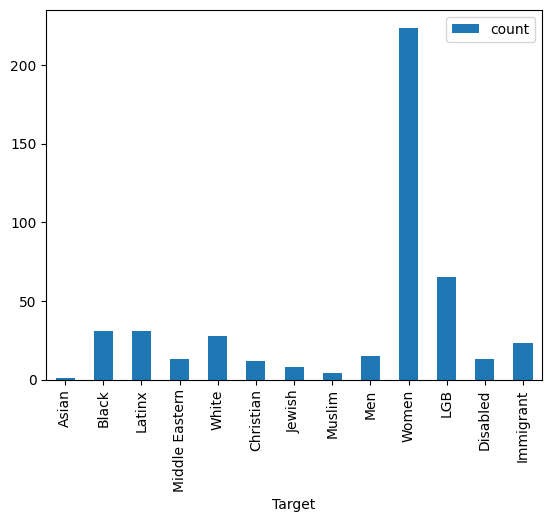

In [ ]:
arabic_target_counts = arabic_prediction_df["Target"].value_counts().reset_index()

arabic_target_counts["Target"] = arabic_target_counts["Target"].astype(str)
arabic_target_counts["Target"] = arabic_target_counts["Target"].replace(demo_class_mapping)

arabic_target_counts["Target"] = pd.Categorical(arabic_target_counts["Target"], categories=class_names, ordered=True)
arabic_target_counts.sort_values("Target", inplace=True)
arabic_target_counts.plot(x='Target', y='count', kind='bar')

## German Predictions

In [ ]:
german_en = german_data['english'].to_list()
len(german_en)

7579

In [ ]:
german_predictions = []
for data in german_en:
    german_predictions.append(predict_category(data))
german_prediction_df = pd.DataFrame({
        "english": german_en,
        "Target": german_predictions,
    })
german_prediction_df.to_csv("german_model_prediction.csv", index=False)

<Axes: xlabel='Target'>

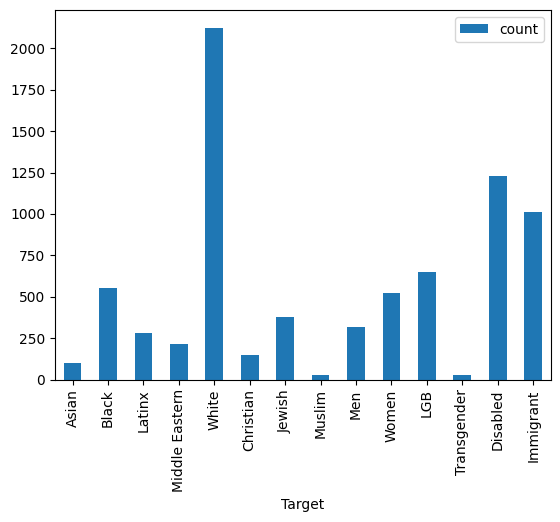

In [ ]:
german_target_counts = german_prediction_df["Target"].value_counts().reset_index()

german_target_counts["Target"] = german_target_counts["Target"].astype(str)
german_target_counts["Target"] = german_target_counts["Target"].replace(demo_class_mapping)

german_target_counts["Target"] = pd.Categorical(german_target_counts["Target"], categories=class_names, ordered=True)
german_target_counts.sort_values("Target", inplace=True)
german_target_counts.plot(x='Target', y='count', kind='bar')

## Korean Predictions

In [ ]:
korean_en = korean_data['english'].to_list()
len(korean_en)

1911

In [ ]:
korean_predictions = []
for data in korean_en:
    korean_predictions.append(predict_category(data))
korean_prediction_df = pd.DataFrame({
        "english": korean_en,
        "Target": korean_predictions,
    })
korean_prediction_df.to_csv("korean_model_prediction.csv", index=False)
korean_prediction_df.head()

english  Target
0  (How the current hotel owner feels) Ah 18 I go...       1
1  ...Naughty people...People who enjoyed other p...       1
2  1. Scratching a person‚Äôs face with a fingernai...       6
3  Within 100 years, after a major sexual war bet...      13
4  Hobbit men under 180cm shouldn't get married. ...       8

### Visualize Korean Hate Speech Distribution

<Axes: xlabel='Target'>

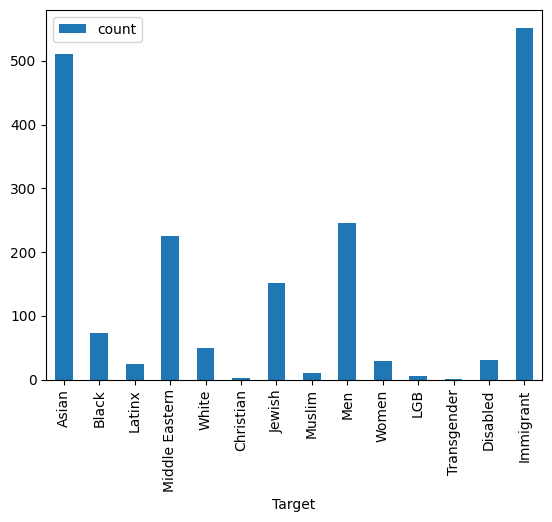

In [ ]:

korean_target_counts = korean_prediction_df["Target"].value_counts().reset_index()

korean_target_counts["Target"] = korean_target_counts["Target"].astype(str)
korean_target_counts["Target"] = korean_target_counts["Target"].replace(demo_class_mapping)

korean_target_counts["Target"] = pd.Categorical(korean_target_counts["Target"], categories=class_names, ordered=True)
korean_target_counts.sort_values("Target", inplace=True)
korean_target_counts.plot(x='Target', y='count', kind='bar')

